# Demo 4: KNN, Training and Test set, Decision boundaries. 20/09

Last week you implemented the 1 nearest neighbor (1NN) algorithm. This week you will implement the KNN algorithm. On top of this, we will also touch upon training and test sets, as well as decision boundary.

- Your first step is to remember how KNN works.
- We provide you with the boilerplate code in which you will need to insert your KNN implementation. This way you will be able to focus on the actual algorithm itself and not have to worry about such things as printing or displaying results.
- You can execute each cell by clicking on Cell/Run all: On the last cell you will observe a constant classifier (which also predicts, regardless of its input, class 1 (blue))

Familiarize yourself with the code in the following 5 sections:
   - **Utility Functions:** Defines helper functions such as for visualization, evaluation, etc.
   - **KNN class:** This is where you will implement the classifier.
   - **Loading and splitting the data:** Loads a dataset and splits it into two parts (train, test)
   - **Initialization and training of classifier:** Trains a KNN model on the train dataset and obtains predictions on the test set
   - **Confusion matrix and decision boundary:** Displays the confusion matrix and visualizes the decision boundary of our trained classifier

**Your objective for this demo session** is to understand the general functioning of the code below and then to fill in the function knn.compute_predictions().

### Python classes

For this demo, we will implement KNN as a **class**. You can read this [tutorial](http://docs.python.org/2/tutorial/classes.html) if you are not familiar with the concept of classes in Object-oriented programming or its syntax in python. The class `knn` is already partially implemented. All that you have left to do is to write the method `compute_predictions`.

## Utility Functions

You do not have anything to implement here. Simply read the code and familiarize yourelf with it. You will be able to test the functions `test` and `gridplot` at the end of the notebook.

In [1]:
%pylab inline
import numpy as np
import random
import pylab
import time

Populating the interactive namespace from numpy and matplotlib


This functions calculates the Minkowski distance between a vector x and a matrix Y. Does this remind you of anything?

In [2]:
def minkowski_mat(x,Y,p=2):
    return (np.sum((np.abs(x-Y))**p,axis=1))**(1.0/p)

The function `conf_matrix` takes as input:

- `testlabels` - test labels
- `predlabels` - prediction labels
and returns a table presenting the results

See the definition of [Confusion matrix](http://fr.wikipedia.org/wiki/Matrice_de_confusion).

In [3]:
def conf_matrix(testlabels, predlabels):

	n_classes = int(max(testlabels))
	matrix = np.zeros((n_classes,n_classes))

	for (test,pred) in zip(testlabels, predlabels):
		matrix[test-1,pred-1] += 1

	return matrix

The function `gridplot` takes as input:

- `classifier` - a classifier such as `knn`
- `train` - a training set
- `test` - a test set
- `n_points` - the width/height of the grid on which to visualize the decision boundary (n,n)

Depending on the speed of your computer, calculating of predictions on the grid can be slow. We recommend doing the first tests with a small grid (say, 25 by 25). You could then augment the size of the grid to 50x50 or even 100x100 to obtain better looking visualizations.

In [25]:
# function plot
def gridplot(classifier,train,test,n_points=50):

    train_test = np.vstack((train,test))
    (min_x1,max_x1) = (min(train_test[:,0]),max(train_test[:,0]))
    (min_x2,max_x2) = (min(train_test[:,1]),max(train_test[:,1]))

    xgrid = np.linspace(min_x1,max_x1,num=n_points)
    ygrid = np.linspace(min_x2,max_x2,num=n_points)

	# calculates the cartesian product between two lists
    # and stores the result in an array
    thegrid = np.array(combine(xgrid,ygrid))

    counts = classifier.compute_predictions(thegrid)
    predictedClasses = np.argmax(counts,axis=1)+1

    # The grid
    # To get a better looking grid:
    #props = dict( alpha=0.3, edgecolors='none' )
    #pylab.scatter(thegrid[:,0],thegrid[:,1],c = classesPred, s=50, edgecolors='none')
    pylab.figure(figsize=(13,10))
    pylab.pcolormesh(xgrid, ygrid, predictedClasses.reshape((n_points, n_points)).T, alpha=.3)
	# Training data points
    pylab.scatter(train[:,0], train[:,1], c = train[:,-1], marker = 'v', s=150)
    # Test data points
    pylab.scatter(test[:,0], test[:,1], c = test[:,-1], marker = 's', s=150)

    ## A hack, since pylab is lacking this functionality... :(
    h1 = pylab.plot([min_x1], [min_x2], marker='o', c = 'w',ms=5) 
    h2 = pylab.plot([min_x1], [min_x2], marker='v', c = 'w',ms=5) 
    h3 = pylab.plot([min_x1], [min_x2], marker='s', c = 'w',ms=5) 
    handles = [h1,h2,h3]
    ## End of hack :)

    labels = ['grid','train','test']
    pylab.legend(handles,labels)

    pylab.axis('equal')
    pylab.show()
    
## http://code.activestate.com/recipes/302478/
def combine(*seqin):
    '''returns a list of all combinations of argument sequences.
for example: combine((1,2),(3,4)) returns
[[1, 3], [1, 4], [2, 3], [2, 4]]'''
    def rloop(seqin,listout,comb):
        '''recursive looping function'''
        if seqin:                       # any more sequences to process?
            for item in seqin[0]:
                newcomb=comb+[item]     # add next item to current comb
                # call rloop w/ rem seqs, newcomb
                rloop(seqin[1:],listout,newcomb)
        else:                           # processing last sequence
            listout.append(comb)        # comb finished, add to list
    listout=[]                      # listout initialization
    rloop(seqin,listout,[])         # start recursive process
    return listout

## KNN Class

The class `knn` takes as parameters:

- `n_classes` - the number of classes in the problem
- `dist_func` - a function to calculate the distance between points
- `n_voisins` - the number of neighbors to visit

The method `train` is actually really only storing the dataset. All of the work is done at prediction time for `knn` models.

The method `compute_predictions` takes as input the unlabeled test set in matrix form and returns the matrix of counts for each test set example. This matrix is hence of dimensions (n_example, n_classes).

You will need to for each test set example:

 - **calculate distances** for every point of the training set (using dist_func)
 - Look through the distances to **find the $k$ nearest neighbors** of the current test example
 - **Calculate the number of neighbors per class** and save them in `counts`
 
 **Note :** `knn.compute_predictions()`'s output needs to be general enough to be used in different contexts. This is why we ask that it returns a matrix containing the counts for each example in the test set and not the predicted class.

In [26]:
class knn:
    def __init__(self,n_classes, dist_func=minkowski_mat, nn=1):
        self.n_classes = n_classes
        self.dist_func = dist_func
        self.nn = nn

    # The train function for knn is really only storing the dataset
    def train(self, train_inputs, train_labels):
        self.train_inputs = train_inputs
        self.train_labels = train_labels

    ###
    # The prediction function takes as input:
    #   test_data - Unlabeled test data points
    # and returns a matrix containing counts for each test set example. 
    # Each row of this matrix contains, for each class, the number of 
    # neighbors belonging to this class. 
    ###
    def compute_predictions(self, test_data):
        # Initialization of the matrix to return
        num_test = test_data.shape[0]
        counts = np.ones((num_test,self.n_classes))

        # For each test datapoint
        for (i,ex) in enumerate(test_data):
            # Find the distances to each training set point
            # using dist_func
            distances = self.dist_func(ex, train_inputs)  
            
            # Go through the training set to find the 
            # neighbors of the current point (ex)
            neighbors_indices = np.argsort(distances)[:self.nn]
            neighbors_labels = self.train_labels[neighbors_indices]

            # Calculate the number of neighbors belonging to each class
            # and write them in counts[i,:]
            for label in neighbors_labels:
                counts[i, label -1] += 1

        return counts

## Loading and splitting the data

The `iris` dataset is divided into two parts, one for training and the other for testing.
It is important to shuffle randomly the dataset before splitting it. Can you tell why?

Only two columns of the dataset are used to visualize them in 2-dimensions.

In [31]:
# load iris
iris = np.loadtxt('iris.txt')
data = iris

# Number of classes
n_classes = 3
# Size of training set
n_train = 120

# The columns (features) on which to train our model
# For gridplot to work, len(train_cols) should be 2
train_cols = [0,1]
# The index of the column containing the labels
target_ind = [data.shape[1] - 1]

# Comment to have random (non-deterministic) results 
#random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Split the data into both sets
train_set = data[train_inds,:]
train_set = train_set[:,train_cols + target_ind]
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Separate the test set into inputs and labels
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1].astype('int32')
train_inputs = train_set[:, :-1]
train_labels = train_set[:, -1].astype('int32')

## Initialization and training of the classifier

Here we take the argmax (class with most votes) of the predictions for each testset example to get a prediction.

Don't forget to rerun this cell if you have modified your model and would like to display the decision boundary in the next section. 

In [48]:
# Number of neighbors (k) for knn
k = 6
print("We will train ",k, "-NN on ", n_train, " training set examples")

# Create the classifier
model = knn(n_classes,dist_func = minkowski_mat, nn = k)
# We train the model
model.train(train_inputs, train_labels)
# We get predictions
t1 = time.clock()
counts = model.compute_predictions(test_inputs)
t2 = time.clock()
print('It took ', t2-t1, ' seconds to calculate the predictions on ', test_inputs.shape[0],' test set examples')

# Majority vote (+1 since our classes are labeled from 1 to n)
classes_pred = np.argmax(counts,axis=1)+1

We will train  6 -NN on  120  training set examples
It took  0.0037599999999997635  seconds to calculate the predictions on  30  test set examples


## Confusion matrix and decision boundary

Here we print the confusion matrix, which is very useful for analyzing which classes our classifier is having a hard time predicting. We also create a graph displaying the training points as well as the test points and the decision boundary of our model.

Before moving on to the next section, please make sure that your $k$-nn implementation works well by executing this code. Do not hesitate to ask questions if you have trouble interpreting the confusion matrix or the graph.

The confusion matrix is:
[[ 9.  1.  0.]
 [ 0. 10.  2.]
 [ 0.  1.  7.]]
The test error is  13.33333333333333 %


/home/oliviermt/miniconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f3115a3e780>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/oliviermt/miniconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f3115a3e208>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/oliviermt/miniconda3/lib/python3.6/site-packages/matplotlib/legend.py:938: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f3115a3e4a8>] instances.
A proxy artist may be used instead.
See: http://ma

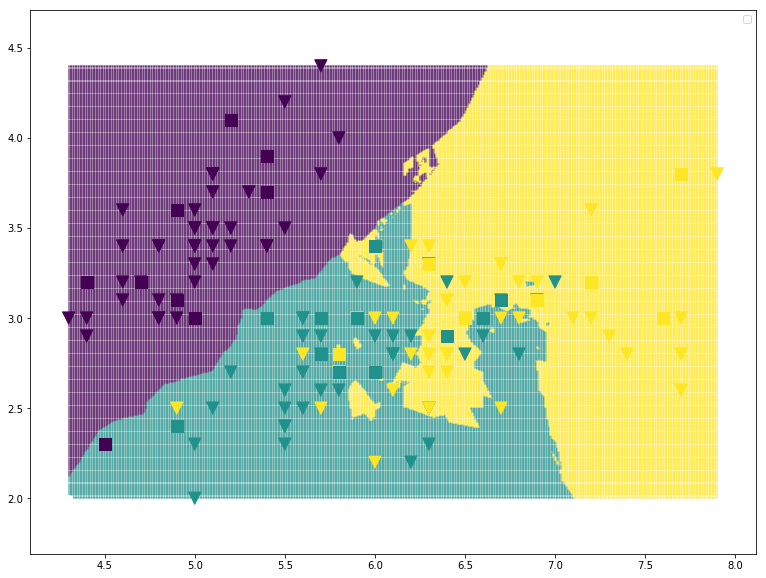

It took  6.907061999999996  seconds to calculate the predictions on 160000  points of the grid
We will save the plot into grid__k=6_c1=0_c2=1.png


<Figure size 432x288 with 0 Axes>

In [50]:
# Run the tests
# Confusion Matrix 
confmat = conf_matrix(test_labels, classes_pred)
print('The confusion matrix is:')
print(confmat)

# Test error
sum_preds = np.sum(confmat)
sum_correct = np.sum(np.diag(confmat))
print("The test error is ", 100*(1.0 - (float(sum_correct) / sum_preds)),"%")

# The grid size will be = grid_size x grid_size
grid_size = 400

if len(train_cols) == 2:
    # Decision boundary
    t1 = time.clock()
    gridplot(model, train_set, test_set, n_points = grid_size)
    t2 = time.clock()
    print('It took ', t2-t1, ' seconds to calculate the predictions on', grid_size * grid_size, ' points of the grid')
    filename = 'grid_' + '_k=' + str(k) + '_c1=' + str(train_cols[0]) + '_c2=' + str(train_cols[1])+'.png'
    print('We will save the plot into {}'.format(filename))
    pylab.savefig(filename,format='png')
else:
    print('Too many dimensions (', len(train_cols),') to print the decision boundary')

## Experimenting

Now that everything is working properly, it is time to play with the model in order to better understand the different parameters. Work directly with the code above to run these tests.

- Vary the size of `train_set` and `test_set` and observe the impact that it has on the test error and the decision boundary
- Try $k=1,2,\dots,10$.
  - Does the test error change?
  - Is there an optimal $k$?
  - Are you able to tell which $k$ is optimal only by looking at the decision boundary?
- Divide the training set into 3 parts: `train_set`, `valid_set` and `test_set` (of size 100, 25 and 25, for example). Train $k$-nn on `train_set`, then choose the optimal $k$ using the `valid_set` and finally obtain an estimate of the generalization error of your model by testing on `test_set`. This time, use all 4 features of the dataset. What do you think the validation set is used for?
  - Is there a difference between the validation error and the test error for the optimal $k$ found using the validation set? Should there be? (the answer can be found in the question)
- Uncomment the line `random.seed(3395)` and run your code multiple times to get statistics on the validation and test errors. You can write a `for` loop to execute the same piece of code multiple times; 10 times should be enough. Calculate the mean and standard deviation for each error.

Do not hesitate to validate your answers by asking questions.